# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key  

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
# 設定緯度範圍陣列 從-90~90
lat_range = (-90, 90)
# 設定經度範圍陣列  從-90~180
lng_range = (-180, 180)
#這些範圍內的城市應該都是在美國


## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
# 空的經緯度陣列
lat_lngs = []
# 空的城市陣列
cities = []

# Create a set of random lat and lng combinations
# 隨機打亂經度陣列內容
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# 隨機打亂緯度陣列內容
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# 經緯度組合起來
# 裡面會有好幾組隨機配對出來的經緯度座標
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# 把每一組隨機出來的經緯度從citipy城市經緯度資料中比對找出座標最相近的城市
for lat_lng in lat_lngs:
    # nearest_city 最相近城市 
    # city_name城市名
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    # 如果找出來的城市名稱沒有重複就新增到城市陣列中
    if city not in cities:
        cities.append(city)
        
# 印出最後隨機配對出來的城市數量(陣列長度) 答案每次都不一定一樣
# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# 用API根據經緯度隨機選至少500不同的城市
# 找出氣候資料(City  Latitude  Longitude   Country   Date   Max Temp   Humidity   Cloudiness    Wind Speed)
# 並用print() 打出city號碼跟名稱  像output
data = {'City':[], 'Lat':[], 'Lng':[], 'Max Temp':[], 'Humidity':[], 'Cloudiness':[], 'Wind Speed':[], 'Country':[], 'Date':[]}

i = 0
setcount =1
for city in cities:
    r = requests.get('https://api.openweathermap.org/data/2.5/weather?q=' + city + '&units=imperial' + '&appid='+ weather_api_key)
    json = r.json()
    if r.status_code == requests.codes.ok:
        if (i > 50):
            setcount +=1
            i=0
            
        print('Processing Record', i + 1, 'of Set' , str(setcount), '|', city)
        # 將api取回的結果放到data的每個欄位中
        data['City'].append(json['name'])
        data['Lat'].append(json['coord']['lat'])
        data['Lng'].append(json['coord']['lon'])
        data['Max Temp'].append(json['main']['temp_max'])
        data['Humidity'].append(json['main']['humidity'])
        data['Cloudiness'].append(json['clouds']['all'])
        data['Wind Speed'].append(json['wind']['speed'])
        data['Country'].append(json['sys']['country'])
        data['Date'].append(json['dt'])
    else:
        print('City not found. Skipping...')
    i+=1
    

Processing Record 1 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | pouembout
City not found. Skipping...
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | alyangula
Processing Record 7 of Set 1 | hue
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | pemangkat
Processing Record 10 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 12 of Set 1 | mataura
City not found. Skipping...
Processing Record 14 of Set 1 | gat
Processing Record 15 of Set 1 | durazno
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | gazanjyk
City not found. Skipping...
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | muravlenko
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of Set 1 | hobart
Processing Record 23 of Set 1 | atuona
Processing Record 24 of Set 1 | lagoa
City not found. Skipping...
Processing Record 26 of Set 1 | kruisfon

Processing Record 3 of Set 5 | bambous virieux
Processing Record 4 of Set 5 | ribeira grande
Processing Record 5 of Set 5 | egvekinot
Processing Record 6 of Set 5 | cooma
Processing Record 7 of Set 5 | tuatapere
Processing Record 8 of Set 5 | klaksvik
Processing Record 9 of Set 5 | selishche
Processing Record 10 of Set 5 | asyut
Processing Record 11 of Set 5 | marzuq
Processing Record 12 of Set 5 | yerofey pavlovich
Processing Record 13 of Set 5 | tiznit
City not found. Skipping...
Processing Record 15 of Set 5 | balkhash
Processing Record 16 of Set 5 | asau
Processing Record 17 of Set 5 | warrnambool
Processing Record 18 of Set 5 | saint-augustin
Processing Record 19 of Set 5 | heihe
City not found. Skipping...
Processing Record 21 of Set 5 | bengkulu
Processing Record 22 of Set 5 | hukuntsi
Processing Record 23 of Set 5 | jalu
Processing Record 24 of Set 5 | georgetown
Processing Record 25 of Set 5 | shiyan
Processing Record 26 of Set 5 | mamou
Processing Record 27 of Set 5 | saldanh

Processing Record 4 of Set 9 | verkhnya syrovatka
Processing Record 5 of Set 9 | talnakh
Processing Record 6 of Set 9 | nantucket
City not found. Skipping...
Processing Record 8 of Set 9 | sorland
Processing Record 9 of Set 9 | anadyr
Processing Record 10 of Set 9 | russell
Processing Record 11 of Set 9 | raudeberg
Processing Record 12 of Set 9 | krasnogvardeyskiy
Processing Record 13 of Set 9 | wanning
Processing Record 14 of Set 9 | zavyalovo
Processing Record 15 of Set 9 | malvern
Processing Record 16 of Set 9 | mount gambier
Processing Record 17 of Set 9 | kirakira
Processing Record 18 of Set 9 | taganak
City not found. Skipping...
Processing Record 20 of Set 9 | college
Processing Record 21 of Set 9 | mbala
Processing Record 22 of Set 9 | isangel
Processing Record 23 of Set 9 | beni mazar
Processing Record 24 of Set 9 | canon city
Processing Record 25 of Set 9 | meylan
Processing Record 26 of Set 9 | belyy yar
Processing Record 27 of Set 9 | sao joao da barra
Processing Record 28 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# 把上面得到的資料變成data frame
df = pd.DataFrame(data)
# 轉出csv
df.to_csv(output_data_file, index = False)
# Display
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Petropavlovsk-Kamchatskiy,53.0452,158.6483,6.80,66,30,6.71,RU,1610232878
1,Butaritari,3.0707,172.7902,81.63,81,50,20.27,KI,1610232878
2,Pouembout,-21.1333,164.9000,85.78,70,100,2.37,NC,1610232879
3,Port Alfred,-33.5906,26.8910,70.00,89,14,7.00,ZA,1610232880
4,Alyangula,-13.8483,136.4192,84.20,89,88,2.30,AU,1610232880
...,...,...,...,...,...,...,...,...,...
555,Nishihara,26.1842,127.7558,55.40,67,75,21.85,JP,1610233150
556,Tangier,35.7806,-5.8137,48.20,66,40,17.27,MA,1610233150
557,Bull Savanna,17.8868,-77.5902,74.62,84,89,5.26,JM,1610233151
558,Bogalusa,30.7910,-89.8487,48.20,49,1,9.22,US,1610233151


In [18]:
# 用  . describe() 顯示下圖
df_desc = df.describe()
df_desc

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,19.941037,19.796097,49.806321,72.869643,52.658929,8.909857,1.610233e+09
std,33.731251,90.343167,30.986080,18.929087,39.781331,10.480745,9.600208e+01
min,-54.800000,-179.166700,-39.260000,10.000000,0.000000,0.220000,1.610233e+09
25%,-8.403400,-56.077875,30.200000,64.000000,5.000000,4.265000,1.610233e+09
50%,23.012700,23.847200,59.225000,77.500000,61.500000,6.910000,1.610233e+09
75%,49.111175,98.733850,76.382500,87.000000,91.000000,11.627500,1.610233e+09
max,78.218600,179.316700,93.690000,100.000000,100.000000,215.190000,1.610233e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
# 刪除濕度>100% 的資料 
newdata = df.drop(df[df['Humidity'] > 100].index)
# 再用 . describe()顯示下圖
newdata 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Petropavlovsk-Kamchatskiy,53.0452,158.6483,6.80,66,30,6.71,RU,1610232878
1,Butaritari,3.0707,172.7902,81.63,81,50,20.27,KI,1610232878
2,Pouembout,-21.1333,164.9000,85.78,70,100,2.37,NC,1610232879
3,Port Alfred,-33.5906,26.8910,70.00,89,14,7.00,ZA,1610232880
4,Alyangula,-13.8483,136.4192,84.20,89,88,2.30,AU,1610232880
...,...,...,...,...,...,...,...,...,...
555,Nishihara,26.1842,127.7558,55.40,67,75,21.85,JP,1610233150
556,Tangier,35.7806,-5.8137,48.20,66,40,17.27,MA,1610233150
557,Bull Savanna,17.8868,-77.5902,74.62,84,89,5.26,JM,1610233151
558,Bogalusa,30.7910,-89.8487,48.20,49,1,9.22,US,1610233151


In [20]:
newdata_desc = newdata.describe()
newdata_desc

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,19.941037,19.796097,49.806321,72.869643,52.658929,8.909857,1.610233e+09
std,33.731251,90.343167,30.986080,18.929087,39.781331,10.480745,9.600208e+01
min,-54.800000,-179.166700,-39.260000,10.000000,0.000000,0.220000,1.610233e+09
25%,-8.403400,-56.077875,30.200000,64.000000,5.000000,4.265000,1.610233e+09
50%,23.012700,23.847200,59.225000,77.500000,61.500000,6.910000,1.610233e+09
75%,49.111175,98.733850,76.382500,87.000000,91.000000,11.627500,1.610233e+09
max,78.218600,179.316700,93.690000,100.000000,100.000000,215.190000,1.610233e+09


In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index. 
# 把刪掉濕度>100% 的資料後的變成新的data frame  並儲存成csv文件
 newdata.to_csv(output_data_file, index = False)

In [22]:
# 創圖表.並且每個圖表都要儲存成pngs檔
# 日期可隨便選一天,但如果要參考是否正確可用04/01/20如下圖,或是在output_data文件夾裡的日期

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

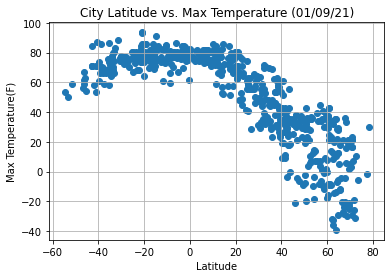

In [23]:
# 緯度 vs溫度(F)  

plt.scatter(newdata["Lat"], newdata["Max Temp"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs. Max Temperature (01/09/21)")
plt.grid()
plt.savefig("output_data/LatitudeTemperature.png") 

it seems to have moderate/strong correlation between these two facotrs. the highter latitude seems to have lower max temperature

## Latitude vs. Humidity Plot

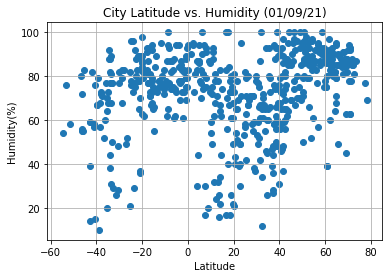

In [24]:
# 緯度 vs 濕度(%)

plt.scatter(newdata["Lat"], newdata["Humidity"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (01/09/21)")
plt.grid()
plt.savefig("output_data/LatitudeHumidity.png") 

it doesn't seem there is correlation between these two facotr. and most of the data has hight humidity

## Latitude vs. Cloudiness Plot

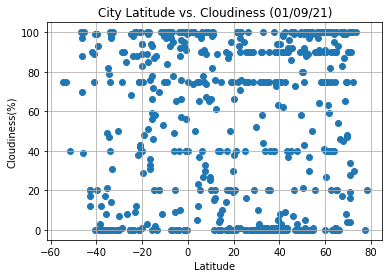

In [25]:
# 緯度 vs 雲層(%)

plt.scatter(newdata["Lat"], newdata["Cloudiness"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (01/09/21)")
plt.grid()
plt.savefig("output_data/LatitudeCloudiness.png") 

it doesn't seem there is correlation between these two facotr. 

## Latitude vs. Wind Speed Plot

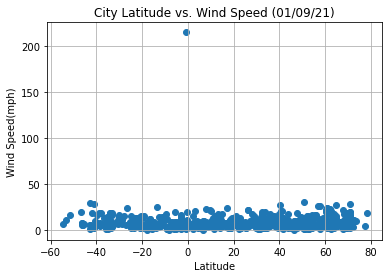

In [26]:
# 緯度 vs 風速(mph)

plt.scatter(newdata["Lat"], newdata["Wind Speed"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed (01/09/21)")
plt.grid()
plt.savefig("output_data/LatitudeWindSpeed.png") 

the correlation between both factors seems t obe none and there is one outlier.  

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [27]:
# 創下面8個scatter plots圖表並有regression line  --分南北 Hemisphere
# northern Hemisphere(北)  --緯度大於等於0
# southern Hemisphere (南) --緯度小於0
# 這個不需要儲存成pngs檔

north = newdata.loc[newdata["Lat"] >= 0 , :]
south = newdata.loc[newdata["Lat"] < 0 , :]

The r-value is : 0.7307345463924787
correlation is -0.85


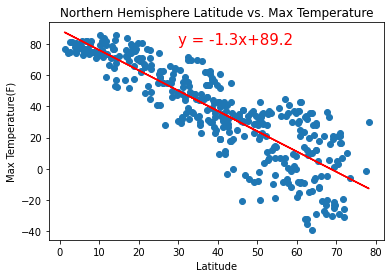

In [48]:
# 北hemisphere - 緯度 vs max溫度(F)

xvalue = north["Lat"]
yvalue = north["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("Northern Hemisphere Latitude vs. Max Temperature")


(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress = xvalue*slope + intercept

line = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue, marker = "o")
plt.plot(xvalue, regress, "r-")
plt.annotate(line,(30,80), fontsize=15, color="red")

print(f'The r-value is : {rvalue**2}')


correlation = st.pearsonr(xvalue, yvalue) 
print(f'correlation is {round(correlation[0],2)}')

the correlation between both factors is strong negative correlation. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.24863610745600562
correlation is 0.5


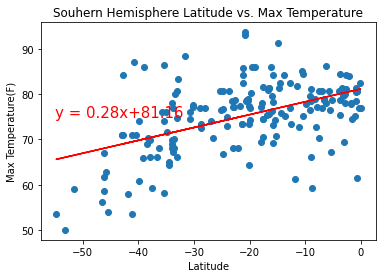

In [47]:
# 南hemisphere - 緯度 vs max溫度(F)


xvalue = south["Lat"]
yvalue = south["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("Souhern Hemisphere Latitude vs. Max Temperature")


(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress = xvalue*slope + intercept

line = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue, marker = "o")
plt.plot(xvalue, regress, "r-")
plt.annotate(line,(-55,75), fontsize=15, color="red")

print(f'The r-value is : {rvalue**2}')


correlation = st.pearsonr(xvalue, yvalue) 
print(f'correlation is {round(correlation[0],2)}')

the correlation between both factors is moderate positive correlation. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.13161878566819107
correlation is 0.36


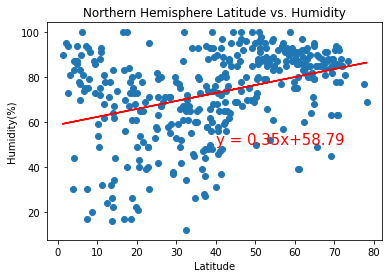

In [46]:
# 北hemisphere - 緯度 vs 濕度(%)

xvalue = north["Lat"]
yvalue = north["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Northern Hemisphere Latitude vs. Humidity")


(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress = xvalue*slope + intercept

line = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue, marker = "o")
plt.plot(xvalue, regress, "r-")
plt.annotate(line,(40,50), fontsize=15, color="red")

print(f'The r-value is : {rvalue**2}')

correlation = st.pearsonr(xvalue, yvalue) 
print(f'correlation is {round(correlation[0],2)}')

the correlation between both factors is weak positive correlation. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.1735725575848648
correlation is 0.42


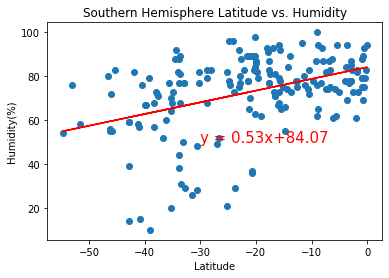

In [45]:
# 南hemisphere - 緯度 vs 濕度(%)

xvalue = south["Lat"]
yvalue = south["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Southern Hemisphere Latitude vs. Humidity")


(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress = xvalue*slope + intercept

line = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue, marker = "o")
plt.plot(xvalue, regress, "r-")
plt.annotate(line,(-30,50), fontsize=15, color="red")

print(f'The r-value is : {rvalue**2}')

correlation = st.pearsonr(xvalue, yvalue) 
print(f'correlation is {round(correlation[0],2)}')

the correlation between both factors is weak positive correlation. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.023161231023085083
correlation is 0.15


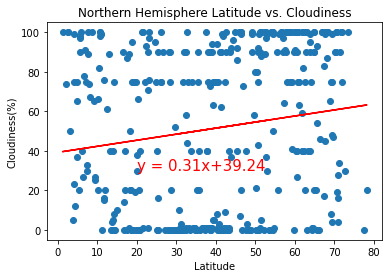

In [44]:
# 北hemisphere - 緯度 vs 雲層(%)

xvalue = north["Lat"]
yvalue = north["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Northern Hemisphere Latitude vs. Cloudiness")


(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress = xvalue*slope + intercept

line = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue, marker = "o")
plt.plot(xvalue, regress, "r-")
plt.annotate(line,(20,30), fontsize=15, color="red")

print(f'The r-value is : {rvalue**2}')

correlation = st.pearsonr(xvalue, yvalue) 
print(f'correlation is {round(correlation[0],2)}')

the correlation between both factors is very weak positive correlation. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.03175152411204914
correlation is 0.18


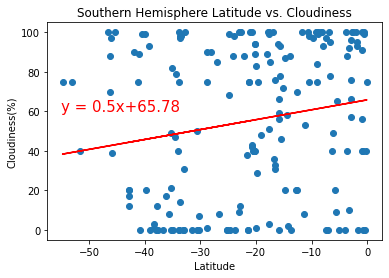

In [43]:
# 南hemisphere - 緯度 vs 雲層(%)

xvalue = south["Lat"]
yvalue = south["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Southern Hemisphere Latitude vs. Cloudiness")


(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress = xvalue*slope + intercept

line = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue, marker = "o")
plt.plot(xvalue, regress, "r-")
plt.annotate(line,(-55,60), fontsize=15, color="red")

print(f'The r-value is : {rvalue**2}')

correlation = st.pearsonr(xvalue, yvalue) 
print(f'correlation is {round(correlation[0],2)}')

the correlation between both factors is very weak positive correlation. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.01134416283684057
correlation is 0.11


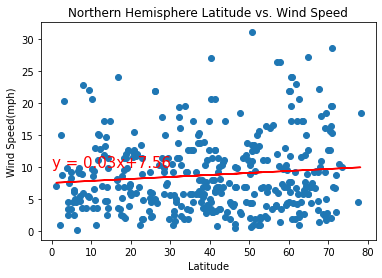

In [41]:
# 北hemisphere - 緯度 vs 風速(mph)

xvalue = north["Lat"]
yvalue = north["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Northern Hemisphere Latitude vs. Wind Speed")


(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress = xvalue*slope + intercept

line = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue, marker = "o")
plt.plot(xvalue, regress, "r-")
plt.annotate(line,(0,10), fontsize=15, color="red")

print(f'The r-value is : {rvalue**2}')

correlation = st.pearsonr(xvalue, yvalue) 
print(f'correlation is {round(correlation[0],2)}')

the correlation between both factors is very weak positive correlation. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.0004617555937400943
correlation is 0.02


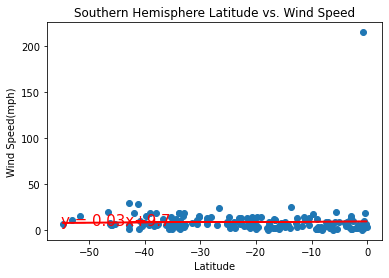

In [40]:
# 南hemisphere - 緯度 vs 風速(mph)


xvalue = south["Lat"]
yvalue = south["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Southern Hemisphere Latitude vs. Wind Speed")


(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress = xvalue*slope + intercept

line = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue, marker = "o")
plt.plot(xvalue, regress, "r-")
plt.annotate(line,(-55,6), fontsize=15, color="red")

print(f'The r-value is : {rvalue**2}')

correlation = st.pearsonr(xvalue, yvalue) 
print(f'correlation is {round(correlation[0],2)}')

the correlation between both factors is very weak, almost none.  